In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,\
HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natehiatt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/natehiatt/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/natehiatt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [333]:
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocessing(text, tokenizer, stopwords, lemmatizer):
    # Lower case
    text = text.lower()
    
    # Tokenize
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    tokens =  [token for token in tokens if token not in stopwords]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [334]:
df = pd.read_csv('../data/final_df.csv')
df.drop(columns=["text_lower", "link", "list_tokens", "string_tokens"], inplace=True)
df["Target"] = df["Target"].astype('int')
df = df.drop(df[(df['Year'] == 2008) & (df['Name'] == 'FORD')].index)
df

,Year,Name,Text,Target
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0
...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1


In [335]:
df['Text'] = df['Text'].astype(str)
tokenized_df = df['Text'].apply((lambda x: preprocessing(x, tokenizer, stopwords, lemmatizer)))
df['tokens'] = tokenized_df
df

,Year,Name,Text,Target,tokens
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"[thank, much, chris, thanks, unlv, hosting, kn..."
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"[well, thank, teacher, yes, think, good, quest..."
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"[donald, applause, well, thank, lester, thanks..."
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"[going, applaud, well, thank, jim, thanks, peo..."
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"[thank, jim, thank, people, hartford, host, wa..."
...,...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1,"[vice, president, cheney, chief, justice, pres..."
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0,"[fellow, citizen, stand, today, humbled, task,..."
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0,"[thank, thank, much, vice, president, biden, c..."
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1,"[chief, justice, robert, president, carter, pr..."


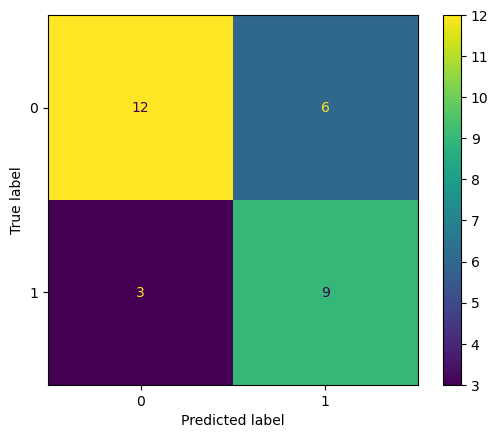

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

X = df[["tokens"]]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# make into sparse matrices
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
X_test = vectorizer.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

# Naive Bayes

clf = GaussianNB()
clf.fit(X_train_tfidf.toarray(), y_train)
y_pred = clf.predict(X_test_tfidf.toarray())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()







[[0.3765052  0.6234948 ]
 [0.38300985 0.61699015]
 [0.48054862 0.51945138]
 [0.50042529 0.49957471]
 [0.61445783 0.38554217]
 [0.52579793 0.47420207]
 [0.3487096  0.6512904 ]
 [0.5140499  0.4859501 ]
 [0.4005873  0.5994127 ]
 [0.36513407 0.63486593]
 [0.4087747  0.5912253 ]
 [0.40347791 0.59652209]
 [0.49343025 0.50656975]
 [0.41232701 0.58767299]
 [0.53617851 0.46382149]
 [0.47676466 0.52323534]
 [0.44426904 0.55573096]
 [0.34328316 0.65671684]
 [0.36450061 0.63549939]
 [0.34654073 0.65345927]
 [0.54653019 0.45346981]
 [0.61968332 0.38031668]
 [0.43399694 0.56600306]
 [0.47810582 0.52189418]
 [0.39584866 0.60415134]
 [0.3734292  0.6265708 ]
 [0.4242565  0.5757435 ]
 [0.42809802 0.57190198]
 [0.41191237 0.58808763]
 [0.4497611  0.5502389 ]]


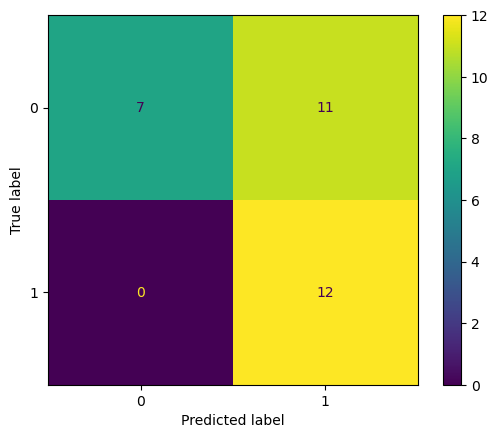

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

X = df[["tokens"]]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# make into sparse matrices
"""
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
X_test = vectorizer.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)
"""
tfidf_vectorizer = TfidfVectorizer(smooth_idf=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
X_test_tfidf = tfidf_vectorizer.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

# Naive Bayes

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# print multinomial probabilities 
print(clf.predict_proba(X_test_tfidf))





In [338]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.transform(df["tokens"].apply(lambda x: " ".join(x)))

# Create a new column "tfidf" in the dataframe with the vectorized data
df["tfidf"] = tfidf_matrix.toarray().tolist()

df


,Year,Name,Text,Target,tokens,tfidf
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"[thank, much, chris, thanks, unlv, hosting, kn...","[0.027706160030842104, 0.013774105677893432, 0..."
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"[well, thank, teacher, yes, think, good, quest...","[0.01836807363007277, 0.01521946665761391, 0.0..."
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"[donald, applause, well, thank, lester, thanks...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"[going, applaud, well, thank, jim, thanks, peo...","[0.04019341647746917, 0.014272957078857767, 0...."
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"[thank, jim, thank, people, hartford, host, wa...","[0.043742214643694315, 0.024162692677434178, 0..."
...,...,...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1,"[vice, president, cheney, chief, justice, pres...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0,"[fellow, citizen, stand, today, humbled, task,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0,"[thank, thank, much, vice, president, biden, c...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1,"[chief, justice, robert, president, carter, pr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [339]:
proba = clf.predict_proba(df["tfidf"].to_list())
df["proba"] = proba.tolist()
df["prob_0"] = df["proba"].apply(lambda x: x[0])
df["prob_1"] = df["proba"].apply(lambda x: x[1])
df["difference"] = df["prob_0"] - df["prob_1"]
df

,Year,Name,Text,Target,tokens,tfidf,proba,prob_0,prob_1,difference
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"[thank, much, chris, thanks, unlv, hosting, kn...","[0.027706160030842104, 0.013774105677893432, 0...","[0.5685141908484563, 0.43148580915155105]",0.568514,0.431486,0.137028
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"[well, thank, teacher, yes, think, good, quest...","[0.01836807363007277, 0.01521946665761391, 0.0...","[0.5864655556022182, 0.41353444439778553]",0.586466,0.413534,0.172931
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"[donald, applause, well, thank, lester, thanks...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49343024685095427, 0.5065697531490392]",0.493430,0.506570,-0.013140
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"[going, applaud, well, thank, jim, thanks, peo...","[0.04019341647746917, 0.014272957078857767, 0....","[0.5972360287976048, 0.40276397120240554]",0.597236,0.402764,0.194472
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"[thank, jim, thank, people, hartford, host, wa...","[0.043742214643694315, 0.024162692677434178, 0...","[0.6117391532587755, 0.3882608467412167]",0.611739,0.388261,0.223478
...,...,...,...,...,...,...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1,"[vice, president, cheney, chief, justice, pres...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.26795970025459775, 0.7320402997454133]",0.267960,0.732040,-0.464081
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0,"[fellow, citizen, stand, today, humbled, task,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6032341749941635, 0.3967658250058427]",0.603234,0.396766,0.206468
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0,"[thank, thank, much, vice, president, biden, c...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5004252936699907, 0.49957470633000745]",0.500425,0.499575,0.000851
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1,"[chief, justice, robert, president, carter, pr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2747272582960309, 0.7252727417039669]",0.274727,0.725273,-0.450545


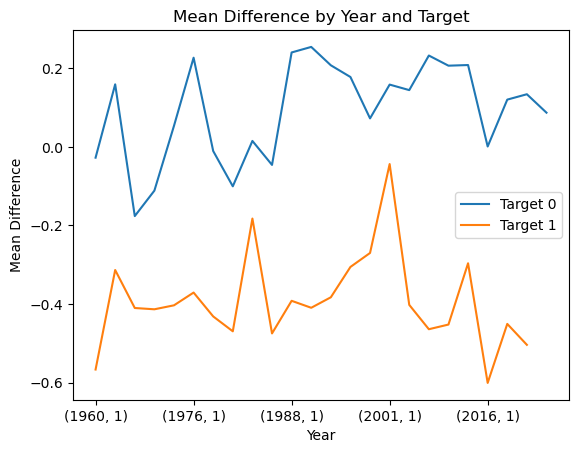

In [340]:

# Group the data by "Target" and calculate the mean of "difference"
grouped_data = df.groupby(["Year", "Target"])["difference"].mean()

# Iterate over each group and plot a line graph
for target, data in grouped_data.groupby("Target"):
    data.plot(label=f"Target {target}")

# Set the title and labels for the plot
plt.title("Mean Difference by Year and Target")
plt.xlabel("Year")
plt.ylabel("Mean Difference")

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [341]:

features = pd.DataFrame((zip(tfidf_vectorizer.get_feature_names_out(), clf.feature_log_prob_[0], clf.feature_log_prob_[1])))
features["diff"] = features[2] - features[1]
features.sort_values(by="diff")[150:200]

,0,1,2,diff
9982,top,-9.050362,-9.207112,-0.156750
3504,enriched,-9.175967,-9.332404,-0.156437
1761,cheap,-9.212632,-9.369005,-0.156373
4556,gut,-9.231989,-9.388340,-0.156350
2886,devoted,-9.232207,-9.388340,-0.156133
4327,gentleman,-9.166877,-9.320849,-0.153973
6224,meet,-8.914304,-9.068213,-0.153910
9581,supporting,-9.119392,-9.272239,-0.152847
7892,rank,-9.193081,-9.345429,-0.152347
9738,taught,-9.196451,-9.348545,-0.152094


In [342]:
stops_dem = ["mccain", "bush", "donald", "romney", "ford", "nixon", "george", "john", "dole", "dan", "richard", "reagan", "trump", "quayle", "jim"]

In [343]:
features.sort_values(by="diff")[-200:-150]

,0,1,2,diff
9054,slowdown,-9.382116,-9.231778,0.150338
5705,law,-8.810620,-8.659736,0.150884
1853,citizen,-8.934329,-8.782902,0.151427
2167,congratulate,-9.353765,-9.202043,0.151722
7161,pennsylvania,-9.336630,-9.184632,0.151997
7856,radical,-9.287005,-9.134794,0.152211
10869,world,-8.246119,-8.093745,0.152375
1562,called,-8.998198,-8.844915,0.153283
3884,fault,-9.382116,-9.228817,0.153299
1241,black,-9.169760,-9.016446,0.153314


In [344]:
stops_rep = ["obama", "hillary", "joe", "clinton", "carter", "khrushchev", "kennedy", "biden", "crosstalk", "bernie", "sander"]

# Expanding stopwords and re-running basic Naive Bayes model

In [345]:
more_stopwords = stops_dem + stops_rep
more_stopwords

['mccain',
 'bush',
 'donald',
 'romney',
 'ford',
 'nixon',
 'george',
 'john',
 'dole',
 'dan',
 'richard',
 'reagan',
 'trump',
 'quayle',
 'jim',
 'obama',
 'hillary',
 'joe',
 'clinton',
 'carter',
 'khrushchev',
 'kennedy',
 'biden',
 'crosstalk',
 'bernie',
 'sander']

In [346]:
len(stopwords)

179

In [347]:
stopwords = stopwords + more_stopwords
len(stopwords)

205

In [348]:
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stopwords = stopwords
lemmatizer = WordNetLemmatizer()

def preprocessing(text, tokenizer, stopwords, lemmatizer):
    # Lower case
    text = text.lower()
    
    # Tokenize
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    tokens =  [token for token in tokens if token not in stopwords]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [349]:
df_morestops = pd.read_csv('../data/final_df.csv')
df_morestops.drop(columns=["text_lower", "link", "list_tokens", "string_tokens"], inplace=True)
df_morestops["Target"] = df_morestops["Target"].astype('int')
df_morestops = df_morestops.drop(df_morestops[(df_morestops['Year'] == 2008) & (df_morestops['Name'] == 'FORD')].index)
df_morestops

,Year,Name,Text,Target
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0
...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1


In [350]:
df_morestops['Text'] = df_morestops['Text'].astype(str)
tokenized_df = df_morestops['Text'].apply((lambda x: preprocessing(x, tokenizer, stopwords, lemmatizer)))
df_morestops['tokens'] = tokenized_df
df_morestops

,Year,Name,Text,Target,tokens
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"[thank, much, chris, thanks, unlv, hosting, kn..."
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"[well, thank, teacher, yes, think, good, quest..."
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"[applause, well, thank, lester, thanks, hofstr..."
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"[going, applaud, well, thank, thanks, people, ..."
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"[thank, thank, people, hartford, host, want, b..."
...,...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1,"[vice, president, cheney, chief, justice, pres..."
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0,"[fellow, citizen, stand, today, humbled, task,..."
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0,"[thank, thank, much, vice, president, chief, j..."
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1,"[chief, justice, robert, president, president,..."


[[0.3753578  0.6246422 ]
 [0.39374327 0.60625673]
 [0.45888244 0.54111756]
 [0.51186515 0.48813485]
 [0.56851886 0.43148114]
 [0.54161404 0.45838596]
 [0.36811244 0.63188756]
 [0.5317571  0.4682429 ]
 [0.42130955 0.57869045]
 [0.38857298 0.61142702]
 [0.41821841 0.58178159]
 [0.41437984 0.58562016]
 [0.45750383 0.54249617]
 [0.42914801 0.57085199]
 [0.54647112 0.45352888]
 [0.4881284  0.5118716 ]
 [0.45053984 0.54946016]
 [0.34831667 0.65168333]
 [0.36012949 0.63987051]
 [0.37120269 0.62879731]
 [0.5496582  0.4503418 ]
 [0.58691336 0.41308664]
 [0.45138793 0.54861207]
 [0.48924338 0.51075662]
 [0.38241239 0.61758761]
 [0.38370522 0.61629478]
 [0.44064822 0.55935178]
 [0.44311622 0.55688378]
 [0.42682891 0.57317109]
 [0.45791948 0.54208052]]


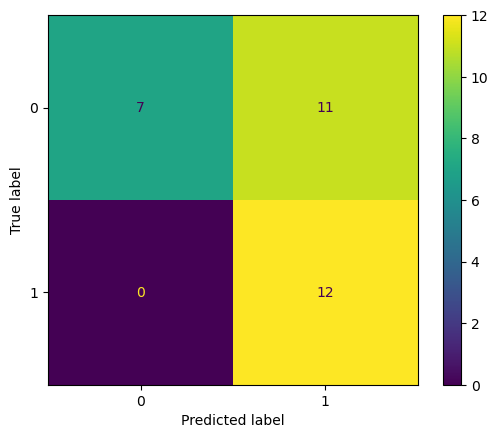

In [351]:
# Re-running the model with expanded stopwords

X = df_morestops[["tokens"]]
y = df_morestops["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

tfidf_vectorizer_morestops = TfidfVectorizer(smooth_idf=True)
X_train_tfidf_morestops = tfidf_vectorizer_morestops.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
X_test_tfidf_morestops = tfidf_vectorizer_morestops.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

# Naive Bayes
clf_morestops = MultinomialNB()
clf_morestops.fit(X_train_tfidf_morestops, y_train)
y_pred = clf_morestops.predict(X_test_tfidf_morestops)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_morestops.classes_)
disp.plot()

# print multinomial probabilities 
print(clf_morestops.predict_proba(X_test_tfidf_morestops))

In [352]:
# Fit and transform the text data
tfidf_matrix_morestops = tfidf_vectorizer_morestops.transform(df_morestops["tokens"].apply(lambda x: " ".join(x)))

# Create a new column "tfidf" in the dataframe with the vectorized data
df_morestops["tfidf"] = tfidf_matrix_morestops.toarray().tolist()
df_morestops


,Year,Name,Text,Target,tokens,tfidf
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"[thank, much, chris, thanks, unlv, hosting, kn...","[0.03049070318453088, 0.01515844012268362, 0.0..."
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"[well, thank, teacher, yes, think, good, quest...","[0.020841211844380064, 0.01726866601027197, 0...."
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"[applause, well, thank, lester, thanks, hofstr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"[going, applaud, well, thank, thanks, people, ...","[0.04091355243065081, 0.01452868228093074, 0.0..."
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"[thank, thank, people, hartford, host, want, b...","[0.048248915253858486, 0.026652141890730917, 0..."
...,...,...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1,"[vice, president, cheney, chief, justice, pres...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0,"[fellow, citizen, stand, today, humbled, task,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0,"[thank, thank, much, vice, president, chief, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1,"[chief, justice, robert, president, president,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [356]:
proba = clf_morestops.predict_proba(df_morestops["tfidf"].to_list())
df_morestops["proba"] = proba.tolist()
df_morestops["prob_0"] = df_morestops["proba"].apply(lambda x: x[0])
df_morestops["prob_1"] = df_morestops["proba"].apply(lambda x: x[1])
df_morestops["difference"] = df_morestops["prob_0"] - df_morestops["prob_1"]
df_morestops


,Year,Name,Text,Target,tokens,tfidf,proba,prob_0,prob_1,difference
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"[thank, much, chris, thanks, unlv, hosting, kn...","[0.03049070318453088, 0.01515844012268362, 0.0...","[0.5494275777692055, 0.45057242223079935]",0.549428,0.450572,0.098855
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"[well, thank, teacher, yes, think, good, quest...","[0.020841211844380064, 0.01726866601027197, 0....","[0.5535075251138659, 0.44649247488612553]",0.553508,0.446492,0.107015
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"[applause, well, thank, lester, thanks, hofstr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4575038307774119, 0.5424961692225821]",0.457504,0.542496,-0.084992
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"[going, applaud, well, thank, thanks, people, ...","[0.04091355243065081, 0.01452868228093074, 0.0...","[0.6128845748313667, 0.38711542516862973]",0.612885,0.387115,0.225769
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"[thank, thank, people, hartford, host, want, b...","[0.048248915253858486, 0.026652141890730917, 0...","[0.6182400145047409, 0.3817599854952474]",0.618240,0.381760,0.236480
...,...,...,...,...,...,...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1,"[vice, president, cheney, chief, justice, pres...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.27387037620347404, 0.7261296237965217]",0.273870,0.726130,-0.452259
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0,"[fellow, citizen, stand, today, humbled, task,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6074080264665709, 0.3925919735334411]",0.607408,0.392592,0.214816
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0,"[thank, thank, much, vice, president, chief, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5118651465205702, 0.48813485347943514]",0.511865,0.488135,0.023730
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1,"[chief, justice, robert, president, president,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2991808931501404, 0.7008191068498483]",0.299181,0.700819,-0.401638


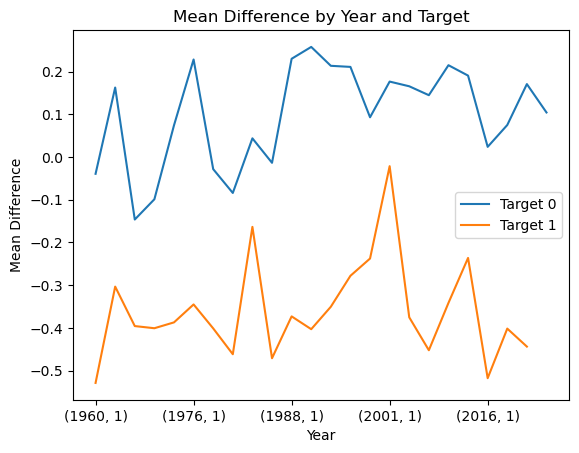

In [357]:
# Group the data by "Target" and calculate the mean of "difference"
grouped_data = df_morestops.groupby(["Year", "Target"])["difference"].mean()

# Iterate over each group and plot a line graph
for target, data in grouped_data.groupby("Target"):
    data.plot(label=f"Target {target}")

# Set the title and labels for the plot
plt.title("Mean Difference by Year and Target")
plt.xlabel("Year")
plt.ylabel("Mean Difference")

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [358]:
# New feature importance
features_morestops = pd.DataFrame((zip(tfidf_vectorizer_morestops.get_feature_names_out(), clf_morestops.feature_log_prob_[0], clf_morestops.feature_log_prob_[1])))
features_morestops["diff"] = features_morestops[2] - features_morestops[1]
features_morestops.sort_values(by="diff")[0:50]

,0,1,2,diff
4674,health,-8.291416,-8.751640,-0.460224
3842,family,-8.199831,-8.623287,-0.423456
10678,wealthiest,-8.961576,-9.361945,-0.400369
5318,invest,-8.875239,-9.255371,-0.380132
4256,future,-8.506810,-8.886593,-0.379783
1873,class,-8.724567,-9.095558,-0.370991
5233,insurance,-8.653695,-9.015738,-0.362043
3292,economics,-9.011434,-9.364596,-0.353162
4204,frontier,-9.015838,-9.349362,-0.333524
144,21st,-8.962750,-9.289952,-0.327202


In [359]:
features_morestops.sort_values(by="diff")[-50:]

,0,1,2,diff
3326,eisenhower,-9.258255,-9.027851,0.230404
6039,man,-8.873517,-8.641115,0.232402
3969,find,-9.052322,-8.819917,0.232405
1092,beautiful,-9.326553,-9.093729,0.232824
8554,saddam,-9.165903,-8.930864,0.235039
1119,behavior,-9.265855,-9.022810,0.243046
10508,victory,-9.220888,-8.977521,0.243367
7636,progress,-9.054217,-8.809771,0.244446
4471,greatest,-9.132658,-8.887358,0.245300
1566,came,-9.042947,-8.796308,0.246639
